In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math

**Goals:**
* Cleaning data frame by dropping null rows, dropping unnecesary columns, and selecting necessary rows.
* Preprocessing data and grouping dataframe by top two max sales min sales and 1 average sale.
The goal of this KNN Algorithm is to predict whether stores have more markdowns and sales on holidays v.s not on holidays

## CLEANING DATA

In [158]:
df = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565963,2012-08-17,16,62.07,3.545,408.10,NaN,1.10,870.38,604.80,6.061,False,27,752.11
565964,2012-08-24,16,61.44,3.558,1556.47,16.00,3.34,869.05,1691.12,6.061,False,27,703.94
565965,2012-08-31,16,64.19,3.556,8702.40,NaN,35.78,3576.08,4493.67,6.061,False,27,614.79
565966,2012-09-14,16,56.69,3.659,5323.84,NaN,9.30,1307.03,4474.84,6.061,False,27,898.63


In [159]:
# Dropping the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Dropping the null rows
df = df.dropna()
df.head()

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
62,2011-11-11,16,29.56,3.505,5042.40,2193.04,200.11,3309.98,2743.18,6.232,False,28,468.42
63,2011-11-18,16,31.73,3.479,2089.46,154.21,3.55,830.60,4425.07,6.232,False,28,279.22
64,2011-11-25,16,31.39,3.424,90.28,126.47,34754.69,24.64,1560.32,6.232,True,28,349.09
66,2011-12-23,16,20.79,3.173,485.00,0.18,475.60,16.20,960.85,6.232,False,28,575.78
67,2011-12-30,16,23.91,3.119,921.67,11778.68,101.87,272.51,1673.25,6.232,True,28,685.46


In [160]:
#drop other unnecesary columns 
df.drop(inplace= True,columns=[ 'fuel_price','unemployment','dept'])

In [161]:
#use conditional to locate all rows after November 4th 2011
new_df = df.loc[df["sale_date"]> "2011-11-04" ]
new_df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42
63,2011-11-18,16,31.73,2089.46,154.21,3.55,830.60,4425.07,False,279.22
64,2011-11-25,16,31.39,90.28,126.47,34754.69,24.64,1560.32,True,349.09
66,2011-12-23,16,20.79,485.00,0.18,475.60,16.20,960.85,False,575.78
67,2011-12-30,16,23.91,921.67,11778.68,101.87,272.51,1673.25,True,685.46
...,...,...,...,...,...,...,...,...,...,...
565957,2012-06-15,16,65.36,7027.33,141.80,125.91,642.76,1980.96,False,909.28
565958,2012-06-22,16,70.41,1291.33,201.00,0.27,696.47,1682.13,False,929.01
565960,2012-07-13,16,70.29,2375.53,17.90,2.07,983.30,1834.23,False,952.86
565961,2012-07-20,16,68.43,1115.42,105.35,4.69,196.54,948.69,False,799.20


In [162]:
# Getting average of markdowns1-5 DataFrame rows (selected by index labels)
##new_df['markdownmean']= new_df[[ 'markdown1', 'markdown2', 'markdown3','markdown4','markdown5'] ].mean(axis=1)

In [163]:
#Selecting wanted columns
freshy= new_df.loc[:,['markdown1', 'markdown2', 'markdown3','markdown4','markdown5','isholiday','store','weekly_sales']] 
freshy.head()

,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,store,weekly_sales
62,5042.40,2193.04,200.11,3309.98,2743.18,False,16,468.42
63,2089.46,154.21,3.55,830.60,4425.07,False,16,279.22
64,90.28,126.47,34754.69,24.64,1560.32,True,16,349.09
66,485.00,0.18,475.60,16.20,960.85,False,16,575.78
67,921.67,11778.68,101.87,272.51,1673.25,True,16,685.46


## PREPROCESSING

In [141]:
sales= freshy[freshy['store'].isin([10, 14,5,33,28])] 

sales

,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,store,weekly_sales
77458,22860.64,12223.82,343.77,20834.37,9895.33,False,28,19801.27
77459,6772.46,1654.68,86.01,1068.35,9835.85,False,28,17643.04
77460,2232.08,179.73,61319.72,513.76,1790.89,True,28,18435.43
77461,2429.88,18.24,347.78,573.31,6432.36,False,28,36015.58
77462,2135.31,1.53,752.34,499.00,5674.11,False,28,43037.04
...,...,...,...,...,...,...,...,...
556854,4564.87,58.48,19.69,1418.34,3764.15,False,14,0.07
556855,4945.52,113.66,4.10,10751.35,3298.31,False,14,0.08
556856,4625.55,62.50,5.84,2100.73,2663.23,False,14,0.09
556857,6647.88,34.56,255.31,6931.80,9414.10,False,14,1320.12


In [142]:
y = top_sales["isholiday"]


In [143]:
top_sales['isholiday'].value_counts()

False    14082
True      1232
Name: isholiday, dtype: int64

In [144]:
X = top_sales.drop("isholiday", axis=1)
X.head()

,markdown1,markdown2,markdown3,markdown4,markdown5,store,weekly_sales
77458,22860.64,12223.82,343.77,20834.37,9895.33,28,19801.27
77459,6772.46,1654.68,86.01,1068.35,9835.85,28,17643.04
77460,2232.08,179.73,61319.72,513.76,1790.89,28,18435.43
77461,2429.88,18.24,347.78,573.31,6432.36,28,36015.58
77462,2135.31,1.53,752.34,499.00,5674.11,28,43037.04


## SPLITTING AND CLASSIFYING DATA

In [164]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [165]:
# Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [166]:
#Transforming the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [167]:
#Checking if y_test is odd
math.sqrt(len(y_test))
#Since its odd no need to use classifier 

61.87891401761993

In [168]:
#Defining model
classifier= KNeighborsClassifier(n_neighbors= 61, p=2, metric= 'euclidean')

In [170]:
#Fitting data train in the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

## CREATE KNN MODEL AND MAKE PREDICTIONS

In [171]:
#Predicting the test set results
y_pred= classifier.predict(X_test)

In [172]:
#Evaluating model
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[3510    0]
 [  30  289]]
0.950657894736842


In [173]:
print(accuracy_score(y_test, y_pred))

0.9921650561504309


In [174]:
 # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 1.000/0.999
k: 11, Train/Test Score: 0.999/0.999
k: 13, Train/Test Score: 0.999/0.999
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.999
k: 19, Train/Test Score: 0.999/0.999


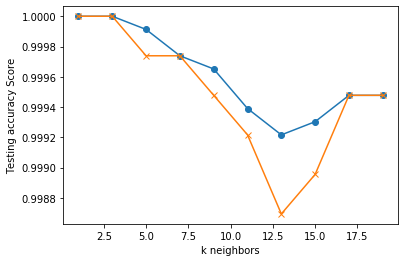

In [175]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [156]:
 # Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.999


* According to the confusion matrix we can see that 3510 of predicted sales and markdowns are not on holidays and 289 are on holidays. Furthermore, there are 30 sales and markdowns not on holidays that are incorrect. The f_1 score is at a 95% accuracy and the accuracy score is at 99% which is really high. 
* According to the KNN algorithm our model is at 99% accuracy. However, it could be that the data was overfitted.
